In [67]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
import scipy.stats as stats



In [68]:
text = 'the quick brown fox jumps over the lazy dog'

In [69]:
#Data
dbConnection = sql.connect('app.db')
db = dbConnection.cursor()

data = db.execute('''
    SELECT user.username, sample.keytimes
    FROM user
    JOIN sample ON sample.user_id = user.id
''').fetchall()

In [70]:
df = pd.DataFrame(data, columns=['user','keytimes'])
df = df.sort_values(by='user')
df['keytimes'] = df['keytimes'].apply(lambda xs: [float(x) for x in xs.strip('[]').split(',')])
df['keytimes']

0     [0.0, 104.0, 184.0, 264.0, 368.0, 448.0, 623.8...
20    [0.0, 104.0, 200.20000004768372, 264.0, 400.0,...
18    [0.0, 280.0, 384.0, 440.0, 728.1000000238419, ...
15    [0.0, 80.0, 200.10000002384186, 280.0, 440.0, ...
13    [0.0, 96.0, 176.0, 264.0, 480.0, 584.0, 784.0,...
9     [0.0, 104.0, 183.89999997615814, 264.0, 424.0,...
7     [0.0, 95.89999997615814, 159.89999997615814, 2...
11    [0.0, 104.0, 184.0, 264.0, 384.0, 464.0, 744.0...
5     [0.0, 224.0, 383.89999997615814, 463.899999976...
3     [0.0, 167.39999997615814, 223.29999995231628, ...
1     [0.0, 119.89999997615814, 200.0, 280.0, 423.79...
6     [0.0, 87.90000009536743, 183.70000004768372, 2...
8     [0.0, 98.20000000018626, 187.70000000018626, 3...
10    [0.0, 74.70000000018626, 146.10000000009313, 2...
22    [0.0, 79.5, 154.0, 662.6000000000931, 1161.0, ...
12    [0.0, 560.6999999997206, 1096.6000000000931, 1...
4     [0.0, 109.10000000009313, 231.60000000009313, ...
14    [0.0, 99.89999999990687, 179.8999999999068

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


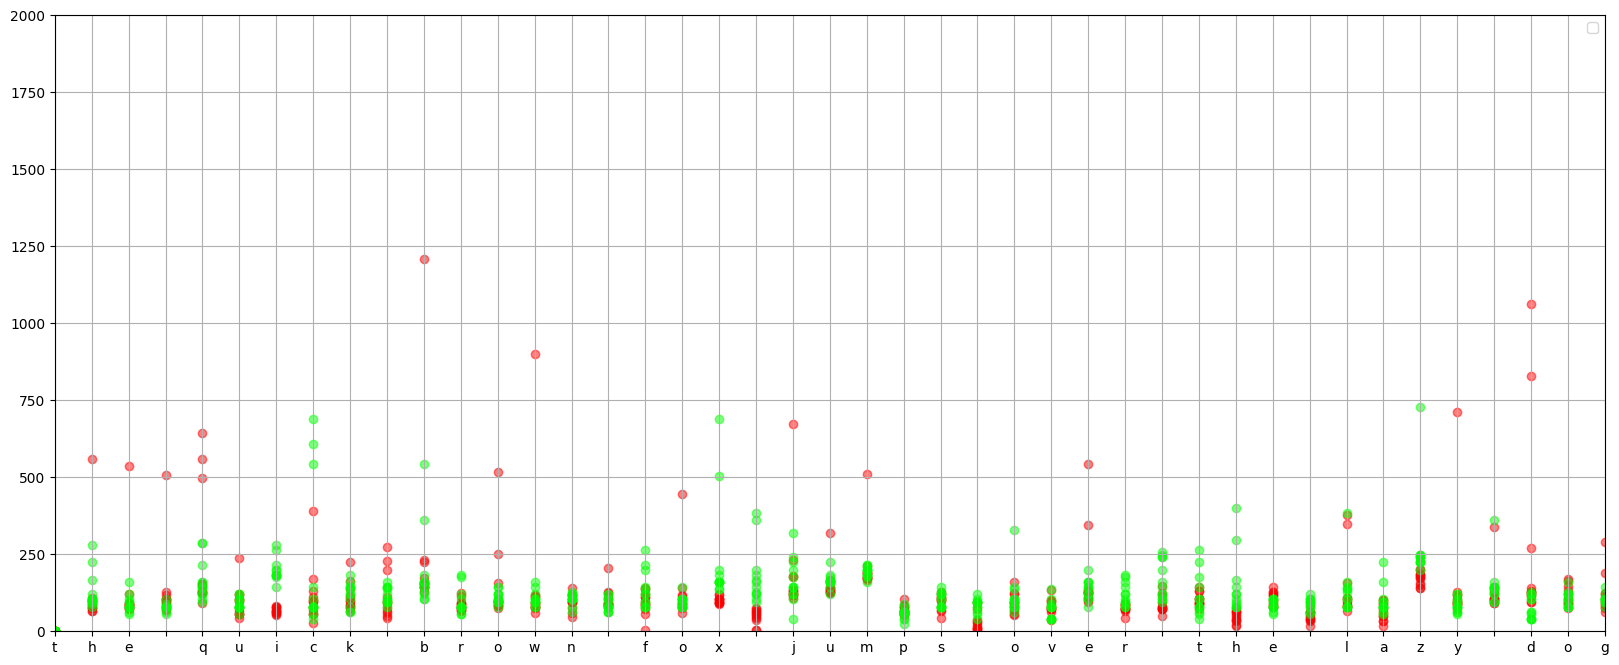

In [71]:
#Show keystrokes for all samples

fig, ax = plt.subplots()

fig.set_size_inches(20,8)

xticks = np.arange(len(text))
xticklabels = list(text)

samples = df.query('user == "orebenson"')['keytimes'].to_numpy()
for sample in samples:
    ax.scatter(xticks, np.diff(sample, prepend=[0]), color=(1,0,0,0.5))

samples = df.query('user == "ibby"')['keytimes'].to_numpy()
for sample in samples:
    ax.scatter(xticks, np.diff(sample, prepend=[0]), color=(0,1,0,0.5))

ax.set_xticks(xticks,xticklabels)
ax.set_xlim(xticks[0],xticks[-1])
ax.set_ylim(0,2000)
ax.legend()
ax.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


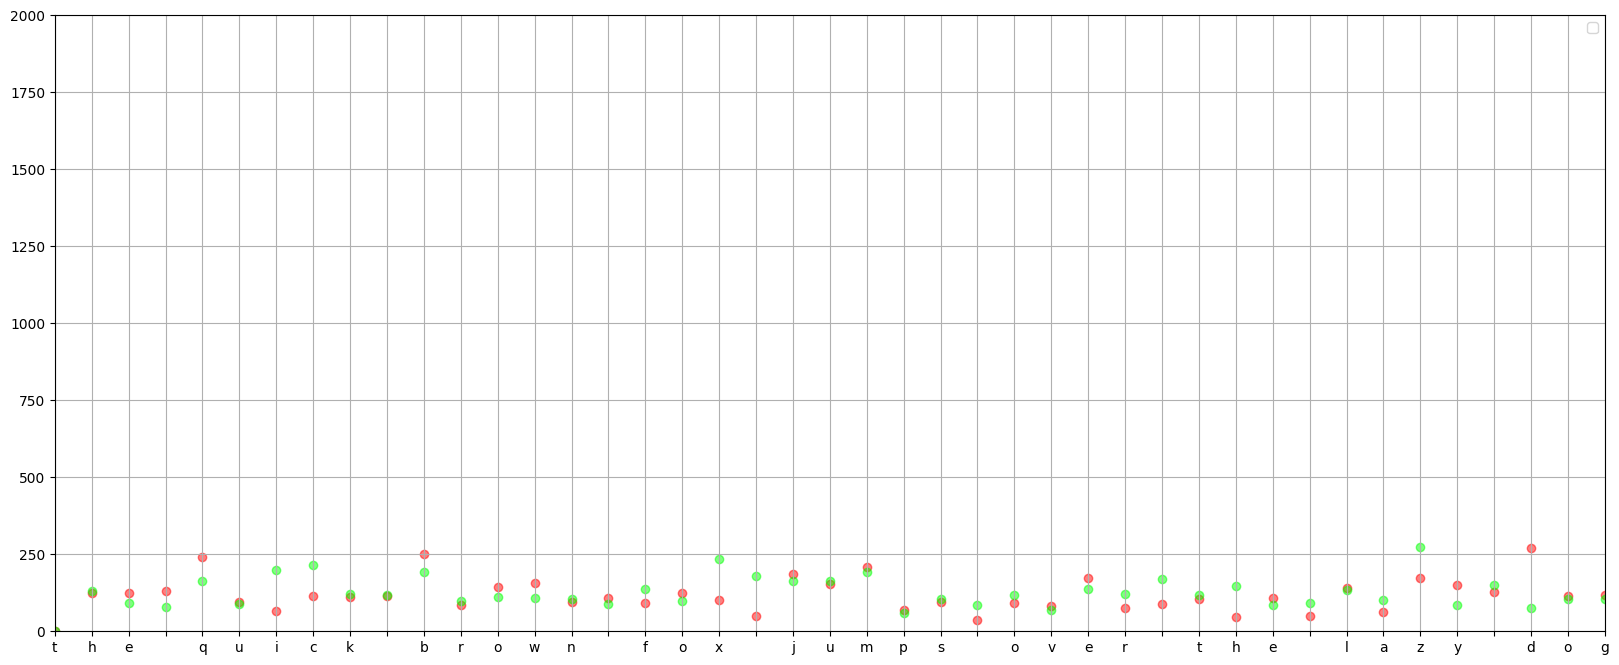

In [72]:
#Show keystrokes for all samples

fig, ax = plt.subplots()

fig.set_size_inches(20,8)

xticks = np.arange(len(text))
xticklabels = list(text)

samples = np.array(df.query('user == "orebenson"')['keytimes'].to_list())
sample = np.mean(samples, axis=0)
ax.scatter(xticks, np.diff(sample, prepend=[0]), color=(1,0,0,0.5))

samples = np.array(df.query('user == "ibby"')['keytimes'].to_list())
sample = np.mean(samples, axis=0)
ax.scatter(xticks, np.diff(sample, prepend=[0]), color=(0,1,0,0.5))

ax.set_xticks(xticks,xticklabels)
ax.set_xlim(xticks[0],xticks[-1])
ax.set_ylim(0,2000)
ax.legend()
ax.grid()

(array([ 1.,  0.,  4., 15., 10.,  2.,  5.,  4.,  1.,  1.]),
 array([  0.   ,  27.395,  54.79 ,  82.185, 109.58 , 136.975, 164.37 ,
        191.765, 219.16 , 246.555, 273.95 ]),
 <BarContainer object of 10 artists>)

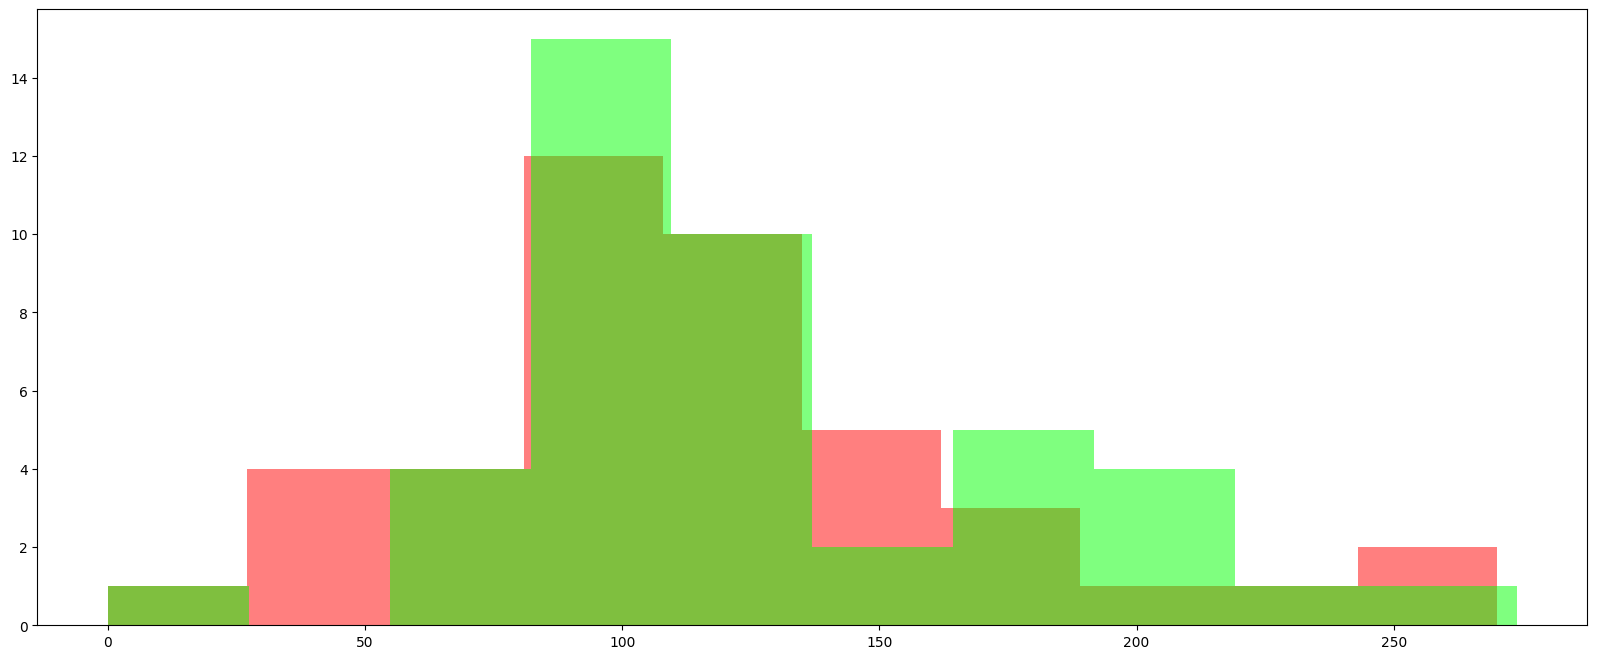

In [73]:
#Show keystrokes for all samples

fig, ax = plt.subplots()

fig.set_size_inches(20,8)

xticks = np.arange(len(text))
xticklabels = list(text)

samples = np.array(df.query('user == "orebenson"')['keytimes'].to_list())
sample = np.mean(samples, axis=0)
ax.hist(np.diff(sample, prepend=[0]), color=(1,0,0,0.5))

samples = np.array(df.query('user == "ibby"')['keytimes'].to_list())
sample = np.mean(samples, axis=0)
ax.hist(np.diff(sample, prepend=[0]), color=(0,1,0,0.5))


In [82]:
np.diff([[0,1,3],[6,10,15]])

array([[1, 2],
       [4, 5]])

In [91]:
def test_pattern1(test, trains):
    trains_diff = np.diff(trains)
    test_diff = np.diff(test)
    train_mean = np.mean(trains_diff, axis=0)
    train_std = np.std(trains_diff, axis=0)
    # diff = np.abs(test-train_mean)/(train_std+0.1)
    diff = stats.norm.pdf(test_diff,train_mean,train_std)
    return diff.sum()

test_pattern1(
    np.array([3,2,5,7,8,8]), 
    np.array([
        [1,2,3,3,1,6],
        [1,4,6,6,2,6],
        [7,2,6,1,7,8]
    ])
)

samples1 = np.array(df.query('user == "orebenson"')['keytimes'].to_list())
samples2 = np.array(df.query('user == "ibby"')['keytimes'].to_list())

for i in range(10):
    score = test_pattern1(samples1[i], samples2[:10])
    print(score)
print('')
for i in range(10,12):
    score = test_pattern1(samples2[i], samples2[:10])
    print(score)

0.33300049450859515
0.2283450898660379
0.24056715521747693
0.2768198839549545
0.31446911925653254
0.3483390646788332
0.37896594323508037
0.3621012045648186
0.3648776956894238
0.26441961397835456

0.36608239990567215
0.393778744163779
